<a href="https://colab.research.google.com/github/MaCavalca/Estatistica_descritiva_dt_Titanic/blob/main/estatistica_descritiva_dt_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Análise Estatística Descritiva do Dataset Titanic

###O Titanic


O "Royal Mail Steamer" (RMS) Titanic, foi um luxuoso transatlântico considerado inafundável, mas que afundou tragicamente em sua viagem inaugural em 1912. O navio, transportava mais de 2.200 passageiros e tripulantes, e atingiu um iceberg no Atlântico Norte levando apenas algumas horas para afundar. 
Apesar de estar equipado com botes salva-vidas, não havia o suficiente para todos os passageiros, e muitos ficaram presos na água gelada.
O desastre resultou na perda de mais de 1.500 vidas e provocou indignação e pesar internacional. Desde então, o naufrágio do Titanic se tornou inspiração para inúmeros livros, filmes e documentários e sua história tem sido usada como advertência sobre os perigos da arrogância humana.



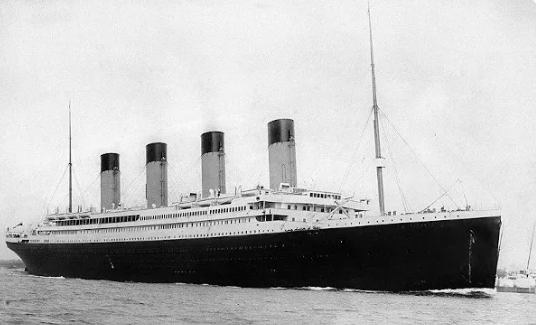






###Estatística

A estatística é a área da matemática dedicada a coleta, análise e interpretação de dados. Com seus conceitos é possível obter informações a partir de dados que são essenciais na tomada de decisão. Os dados fornecem informações objetivas e fundamentadas que ajudam a reduzir incertezas e a minimizar o risco de tomar decisões equivocadas em diversas áreas, como na ciência, na economia, na saúde, entre outras.

A estatística pode ser dividida em duas áreas principais: estatística descritiva e estatística inferencial:
- A estatística inferencial busca fazer generalizações e inferências sobre uma população a partir de uma amostra de dados.
- A estatística descritiva se concentra na descrição e resumir as características de um conjunto de dados, permitindo uma compreensão mais completa e precisa das informações coletadas. Seus principais conceitos incluem: 

 - Medidas de tendência central: São medidas que representam o valor típico ou central de um conjunto de dados, como a média, a mediana e a moda.

 - Medidas de dispersão: São medidas que indicam o quanto os valores de um conjunto de dados se afastam de uma medida de tendência central, como a variância, o desvio padrão e o intervalo interquartil.

 - Gráficos: Os gráficos são uma forma visual de representar os dados, permitindo identificar padrões, tendências e valores extremos, como histogramas, boxplots e gráficos de dispersão.

 - Distribuição de frequência: É a contagem de quantas vezes cada valor aparece em um conjunto de dados, sendo representada por uma tabela de frequência.

 - Medidas de posição relativa: São medidas que indicam a posição de um valor em relação aos demais valores do conjunto de dados, como percentis e quartis.

A estatística é uma ferramenta importante para o planejamento de pesquisas, avaliação de resultados e tomada de decisões baseadas em dados. Por meio de seus conceitos é possível identificar tendências, padrões e relacionamentos em dados, permitindo uma melhor compreensão de fenômenos complexos e a criação de modelos preditivos.



###O dataset Titanic

Neste projeto, será utilizada a tabela de dados train.csv referente ao problema do Titanic, disponível no Kaggle:<br>
https://www.kaggle.com/competitions/titanic/data 

Serão aplicados conceitos de  estatística descritiva para determinar se alguns grupos de pessoas estavam mais predipostos a sobreviver diante de outros naufrágio do navio. Serão analisadas variáveis como idade, sexo, classe sócio-econômica, tarifa entre outros.

###Entendo o Metadados do dataset

***A seguir as Variáveis do dataset serão explicadas:***

- **PassergenId**: identifica cada passageiro, é a chave do dataset.
- **Survived**: variável categórica (nominal) que identifica se a pessoa sobreviveu sim (1) ou não (0). 
- **Pclass**: variável numérica ordinal que representa a classe em que o passageiro viajou.
 - 1st = Upper (Primeira Classe)
 - 2nd = Middle (Segunda ou Média Classe)
 - 3rd = Lower (Terceira ou Baixa/Inferior Classe)
- **Name**: variável nominal, representa o nome do passageiro. 
- **Sex**: variável nominal.
- **Age**: variável numérica, está em formato fracionado, caso idade seja menor que 1. Se a idade é estimada, estará na forma xx.5.
- **SisSp**: variável numérica discreta  que representa se o passageiro tinha familiares a bordo:     
  - Sibling = brother, sister, stepbrother, stepsister (irmão, irmã..).
  - Spouse = husband, wife (mistresses and fiancés were ignored) (marido e esposas).
- **Parch**: referente a relação de família por:
  - Parent = mother, father (mãe, pai)
  - Child = daughter, son, stepdaughter, stepson (filha, filho...)
  - Algumas crianças viajam apenas com a babá, portanto o parch delas é zero.
- **Ticket**: número do ticket
- **Fare**: a tarifa paga pelo passageiro
- **Cabin**: número da cabine do passeiro
- **Embarked**: variável categórica refernte ao local de embarque do passageiro.

###Mapeando o Google Drive para possibilitar o acesso aos arquivos de leitura

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Visualizando a tabela train.csv

-  Importando as bibliotecas

In [ ]:
import pandas as pd 
import statistics  as sts 
import seaborn as sns 
import matplotlib.pyplot as plt

####Apresentando os dados da tabela train.csv

In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/PoD Academy/01 - Nivelamento/02 - Estatística/train.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Tamanho do dataframe df_train

df_train.shape

(891, 12)

In [ ]:
# Verificando a quantidade de linhas não-nulas e os tipos das colunas

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Calculando a quantidade de valores nulos para cada coluna

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Analisando as linhas de comando anteriores temos:

- O dataframe df_train possui 891 linhas ou cadastros de passeiros e 12 colunas ou variáveis.
- Todas as colunas possuem tipos de dados compatíveis com os dados presentes nelas.
- As colunas que possuem dados faltantes (NAN) são:

 - Age: 177 NANs
 - Cabin: 687 NANs
 - Embarked = 2 NANs

Como o "PassengerId" é a variável única de identificação, chamada também de  índice, é uma boa prática verificar se não há valores nulos, já sabemos que não há, ou repetidos. Vamos verificar se há dados repetidos.

In [ ]:
df_train["PassengerId"].duplicated().value_counts()

False    891
Name: PassengerId, dtype: int64

Como pode ser visto, a variável "PassengerId" não possuí nenhum valor repetido 


###Tratamento de dados e análise exploratória com estatística descritiva

####Variável **Age** (Idade):






In [ ]:
#Explorando a coluna numérica Age
 
df_train['Age'].describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Por meio do método describe() temos acesso as informações referentes a:
- Quantidade de pasageiros = 714
- Média das Idades (mean) = 29,7 anos<br>
- Desvio Padrão (std) = 14,5
- Idade mínima (min) = 0,42 anos<br>
- Idade em 25%  = 20,1 anos<br>
- Mediana da Idades (50%) = 28,0 anos<br>
- Idade em 75%  = 38,0 anos<br>
- Idade máxima (max) = 80,0 anos<br>

Para a faixa de idade entre 20,1 anos (25%) e 38,0 anos (75%) temos 50% dos passageiros.

OBS: Como a média (29,7 anos) e a mediana (28, 0 anos) são bem próximas os dados não devem ter muitos outliers.

- Como foi visto anteriormente, as colunas Age (Idade), Cabin (Cabine) e Embarked (Embarcou) possuem valores missing que precisam ser tratados antes de serem realizados os cálculos. 

- Uma abordagem que poderia ser feita para os valores missing de Age, como eles não possuem outliers, é substituí-los pela mediana ou média, mas optamos apenas por retirar as linhas com valores missing.


In [ ]:
# Retirando os valores nulos
age = df_train['Age'].dropna()

A seguir, vamos apresentar a distribuição das Idades dos Passageiros.

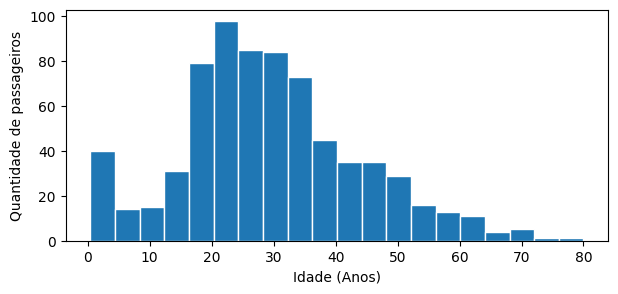

In [ ]:
# Distribuição da Idade dos Passageiros - Histograma

plt.figure(figsize=(7,3))
plt.hist(age, bins=20, edgecolor='white')
plt.xlabel('Idade (Anos)')
plt.ylabel('Quantidade de passageiros')
plt.show()

O histograma apresenta a distribuição das Idades, onde é possível observar que há uma maior concentração de passageiros com idades entre 20 e 38 anos, como já havíamos visto com o método describe(). Há um pico com cerca de 40 passageiros com idade inferior à 5 anos, e um maior pico com cerca de 98 passageiros com idade entre 20 e 25 anos. Vemos que os valores das idades se encontram entre os valores de 0 à 80 anos, que são valores possíveis para a idade, com isso, também é possível observar a ausência de outliers.


- Calculando as métricas estatísticas pelos métodos mean(), media() e mode()

In [ ]:
# Calculando a média, a mediana e a moda da variável Age

media = round(age.mean(), 2)
mediana = round(age.median(), 2)
moda = round(age.mode(), 2)

print(f'Média da idade: {media} anos.')
print(f'Mediana da idade: {mediana} anos.')
print(f'Moda da idade: {moda} anos.')

Média da idade: 29.7 anos.
Mediana da idade: 28.0 anos.
Moda da idade: 0    24.0
Name: Age, dtype: float64 anos.


###Variáveis **Survived** (Sobreviveu) e **Pclass** (Classe do Passageiro):

- Proporção de passageiros sobreviventes e não sobreviventes em cada classe (1ª, 2ª e 3ª)

In [ ]:
# Construindo um dataframe com os passageiros que sobreviveram (1) ou não (0) por classe

survived_pclass = df_train.groupby(['Survived'])['Pclass'].value_counts()
survived_pclass = pd.DataFrame(survived_pclass)
survived_pclass.rename(columns={'Pclass':'Quantidade'}, inplace=True)
survived_pclass.sort_values(by=['Survived', 'Pclass'])

Quantidade
Survived Pclass            
0        1               80
         2               97
         3              372
1        1              136
         2               87
         3              119

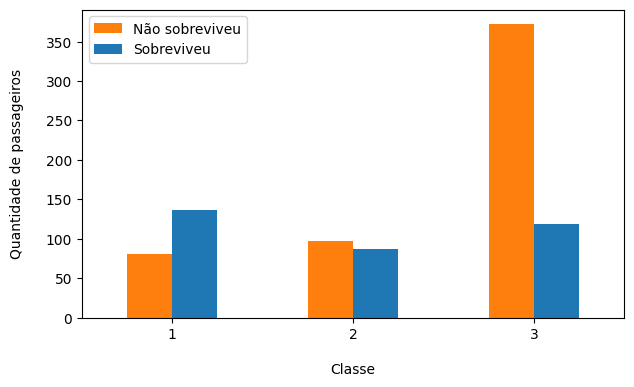

In [ ]:
# Visualizando o dataframe survived_pclass por um gráfico de barras agrupadas

survived_pclass.unstack(level=0).plot(kind='bar', figsize=(7,4),
                                      color=['tab:orange','tab:blue'])
plt.xlabel('\nClasse')
plt.ylabel('Quantidade de passageiros\n')
plt.legend(['Não sobreviveu','Sobreviveu'])
plt.xticks(rotation=0)
plt.show()

- Calculando a frequência absoluta (Quantidade) e relativa (%) de sobreviventes e não sobreviventes para cada classe.

 - A frequência absoluta descreve o número de vezes que um determinado valor para uma variável (item de dados) foi observado.
 - A frequência relativa descreve o número de vezes que um determinado valor para uma variável (item de dados) foi observado em relação ao número total de valores para essa variável. A frequência relativa é calculada dividindo-se a frequência absoluta pelo número total de valores da variável.<br>
Existem dois modos possíveis para calcular a frequência relativa:
   - Frequência relativa ao total de passageiros: 
    - Total = 891
   - Frequência relativa à classe: 
    - P1: 216
    - P2: 184
    - P3: 491


- Calculando a frequência relativa de sobreviventes ou não em relação ao total de passageiros

In [ ]:
survived_pclass['%'] = round(survived_pclass['Quantidade']/survived_pclass['Quantidade'].sum()*100, 2)
survived_pclass.sort_index()

Quantidade      %
Survived Pclass                   
0        1               80   8.98
         2               97  10.89
         3              372  41.75
1        1              136  15.26
         2               87   9.76
         3              119  13.36

A tabela acima mostra que do total de 812 passageiros, os que eram da terceira classe e não sobreviveram correspondem a 41,75%, e apenas o correspondente a 8,98% não sobreviveu e era da primeira classe. Já os que sobreviveram e eram da primeira classe correspondem a 15,26%, sendo apenas 9,76 correspondentes aos que sobreviveram da segenda classe.

- Calculando a frequência relativa de sobreviventes por Classe

In [ ]:
# Quantidade por classe
qtd_class = pd.DataFrame(df_train.Pclass.value_counts()) 

# Cálculo da frequência absoluta de sobreviventes 
qtd_class['Frequência absoluta de sobreviventes'] = df_train.groupby('Pclass')['Survived'].sum()

#Cálculo da frequência relativa de sobreviventes (%)
qtd_class['Frequência relativa de sobreviventes (%)'] = (qtd_class['Frequência absoluta de sobreviventes']/qtd_class['Pclass'] *100).round()

qtd_class.sort_values(by=['Frequência relativa de sobreviventes (%)'], ascending=False)

,Pclass,Frequência absoluta de sobreviventes,Frequência relativa de sobreviventes (%)
1,216,136,63.0
2,184,87,47.0
3,491,119,24.0


Dentre os passageiros que sobreviveram o maior percentual foi da primeira classe (63%), seguido pela segunda classe (47%) e terceira classe (24%).

- Calculando a frequência relativa de não sobreviventes por Classe

In [ ]:
# Quantidade por classe
qtd_class = pd.DataFrame(df_train.Pclass.value_counts())

# Cálculo da frequência absoluta de não sobreviventes 
qtd_class['Frequência absoluta de não sobreviventes'] = df_train[df_train['Survived'] == 0].groupby('Pclass')['Survived'].count()

#Cálculo da frequência relativa de sobreviventes (%)
qtd_class['Frequência relativa de não sobreviventes (%)'] = (qtd_class['Frequência absoluta de não sobreviventes']/qtd_class['Pclass'] *100).round()

qtd_class.sort_values(by=['Frequência relativa de não sobreviventes (%)'], ascending=False)

,Pclass,Frequência absoluta de não sobreviventes,Frequência relativa de não sobreviventes (%)
3,491,372,76.0
2,184,97,53.0
1,216,80,37.0


Dentre os passageiros que não sobreviveram o maior percentual foi da terceira classe (76%), seguido pela segunda classe (53%) e terceira classe (37%).

###Variável **Fare** (Tarifa)

- Distribuição dos valores da variável Tarifa

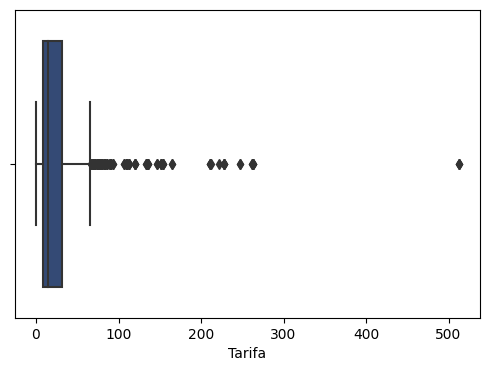

In [ ]:
plt.figure(figsize =(6, 4))
colors = ['#294680']

ax = sns.boxplot(data = df_train, x ="Fare", palette=colors)
plt.xlabel("Tarifa")

plt.show()

In [ ]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- Por meio do boxplot e da tabela acima vemos que a variável Tarifa (Fare) tem valor mínimo de zero e valor máximo 512,3. 
- A mediana, a linha central do retângulo (também chamada de Q2 ou 50%), não está dividindo simetricamente os dados, estando mais próxima dos valores menores de Tarifa, ou de Q1, ou 25% mostrando que os dados são assimétricos positivos.
- A dispersão dos dados pode ser representada pelo intervalo interquartil (Q3-Q1) e é igual a 23,1.
- A cauda superior é maior em comprimento em relação a cauda inferior, mostrando uma maior dispersão dos valores de maiores de Tarifa. Os valores acima da cauda superior são chamados de outliers.
- Como não temos valores além da cauda inferior, podemos calcular o limite superior para detectar outliers por:
 - Limite Superior = Q3 + 1,5 * (Q3-Q1) = 31 + 1,5 * (31 - 7,9104) = 65,6
 
 Então, os valores para tarifas acima de 65,6 são considerados outliers.

 Em seguida, calculamos quantos outliers há:

In [ ]:
# Calculando os outliers (os percentis inferiores e superiores)
q1 = df_train['Fare'].quantile(0.25)
q3 = df_train['Fare'].quantile(0.75)
iqr = q3 - q1

df_outliers = df_train[(df_train["Fare"] < q1 - 1.5*iqr) | (df_train["Fare"] > q3 + 1.5*iqr)]
df_outliers['PassengerId'].count()

116

- Inicialmente temos 801 cadastros de passageiros e pelos cálculos acima temos que 116 pagaram um valor outlier de Tarifa, ou seja, acima de 65,6 e até 512,3.

Agora vamos separar a Tarifa entre os passageiros sobreviventes e não sobreviventes.

- Comparando a distribuição da tarifa paga pelos passageiros sobreviventes e não sobreviventes

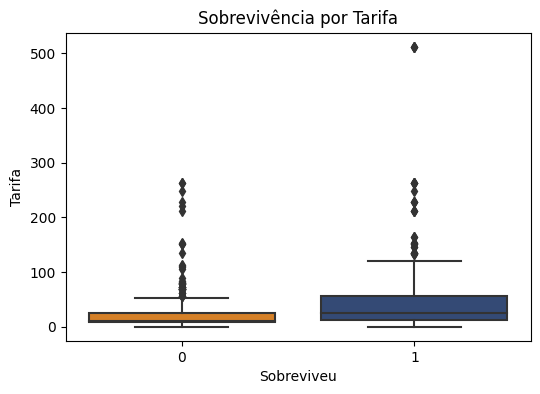

(891, 12)

In [ ]:
plt.figure(figsize =(6, 4))
colors = ['#f2810a', '#294680']

ax = sns.boxplot(data = df_train, x ="Survived", y ="Fare", palette=colors)
plt.title("Sobrevivência por Tarifa")
plt.xlabel("Sobreviveu")
plt.ylabel("Tarifa")

plt.show()

df_train.shape

In [ ]:
agrupando = df_train.groupby("Survived")["Fare"].describe()
agrupando

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


-  Vemos que nos dois casos a tarifa se inicia em zero e a distribuição dos valores são positivamente assimétricos. 

- Por meio da figura e tabela acima podemos ver que a distribuição da Tarifa para os passageiros sobreviventes (valor 1) apresenta maiorers valores: máximo (512,3), média (48,4), mediana (26) e intervalo interquartil (Q3-Q1) (44,5) em relação aos não sobreviventes (valor zero) que foram iguais a: valor máximo igual a 263, média igual a 22,1, mediana igual a 10,5 e Q3-Q1 igual a 18,1. 

- Cerca de 50% dos passageiros sobreviventes pagaram tarifas entre 12,5 e 57, enquanto que, para os não sobreviventes este valor está entre 7,8 e 26.  Com isso, podemos relacionar os sobreviventes aos maiores valores de tarifas, cerca do dobro, pago pelos não sobreviventes. 

- Para os dois casos, sobreviveu e não sobreviveu, observamos outliers, mas os não sobreviventes apresentam maior número de outliers, e para os sobreviventes.há um valor de outlier acima de 500.


###Análise da relação entre a Idade e a Tarifa paga pelos passageiros por meio de um gráfico de dispersão.

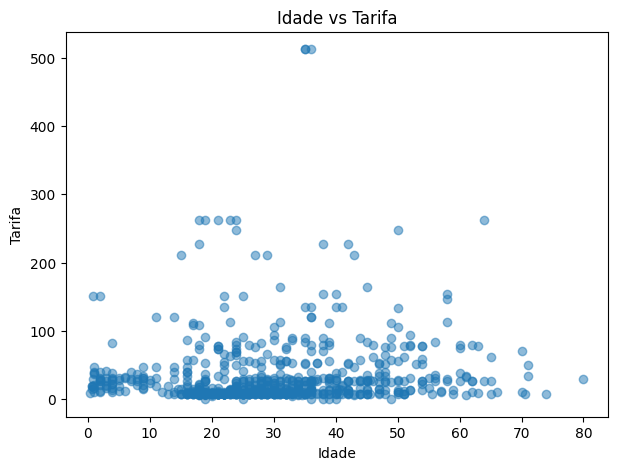

In [ ]:
plt.subplots(figsize=(7,5))
plt.scatter(df_train['Age'], y=df_train['Fare'], alpha=0.5)
plt.title("Idade vs Tarifa")
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()

- Pela figura acima vemos que a grande maioria das tarifas não supera o valor de 300, mas não podemos atestar se o passageiro mais velhos tendem a pagar mais ou menos, por exemplo.

- Podemos incrementar esse gráfico adicionando, por exemplo, a variável categórica sexo no gráfico, para isso, vamos mapear os dois sexos através de duas cores distintas a seguir.


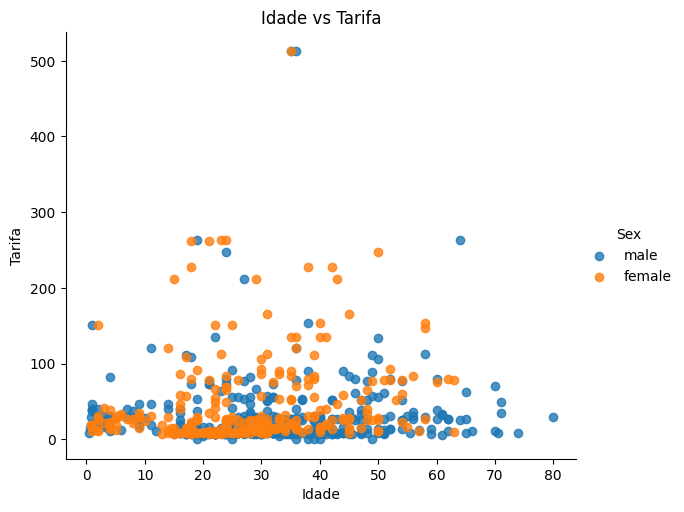

In [ ]:
sns.lmplot(x='Age', y='Fare', data=df_train, hue='Sex', fit_reg=False, height=5, aspect=1.2)

plt.title("Idade vs Tarifa")
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()


Através da figura acima vemos que parece não existir diferença quando analisado o sexo também..


###Identificando a proporção de passageiros do Titanic que viajaram acompanhados (com cônjuge ou irmãos/pais) e os que viajaram sozinhos.

- Obs: Para esta resolução temos que levar em consideração que os bebês acompanhados pela babá contam como viajando sozinhos (Parch = 0), assim como, os que viajam sem o cônjuge e ou irmão/pais (SibSp = 0)

- Calculando e separando os passageiros que viajam sozinhos e os que estão acompanhados

In [ ]:
sozinhos = df_train[(df_train.SibSp == 0) & (df_train.Parch == 0)]
acompanhados = df_train[(df_train.SibSp != 0) | (df_train.Parch != 0)]

print(f'Sozinhos: {sozinhos.shape}')
print(f'Acompanhados: {acompanhados.shape}')

Sozinhos: (537, 12)
Acompanhados: (354, 12)


- Gerando o gráfico de proporção de passageiros que viajaram acompanhados e os que viajaram sozinhos

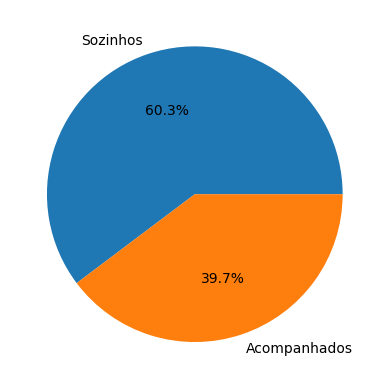

In [ ]:
labels = ['Sozinhos', 'Acompanhados']
sizes = [537, 354]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');

A figura acima mostra que a maioria dos passageiros 60,3% viajaram sozinhos e 39,7% viajaram acompanhados.

###Correlação de Pearson (r)

- A correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. Ela varia de -1 a 1, onde 1 significa uma correlação positiva perfeita, -1 significa uma correlação negativa perfeita e zero significa ausência de correlação:

 - r = |0,10| -> correlação fraca.
 - r = |0,30| -> correlação moderada.
 - r = |0,50| -> correlação forte.

- Cálculo do coeficiente de Correlação de Pearson entre as variáveis **Idade** e **Tarifa**


In [ ]:
corr_pearson = df_train[['Age','Fare']].corr()

print(round(corr_pearson, 3))

        Age   Fare
Age   1.000  0.096
Fare  0.096  1.000


Temos que o coeficiente de correlação de Pearson (r) é de 0.096, que é considerada uma correlação fraca. Nesse caso, podemos concluir que não existe uma correlação entre a Idade e a Tarifa.


- Gráfico de calor da matriz de correlação

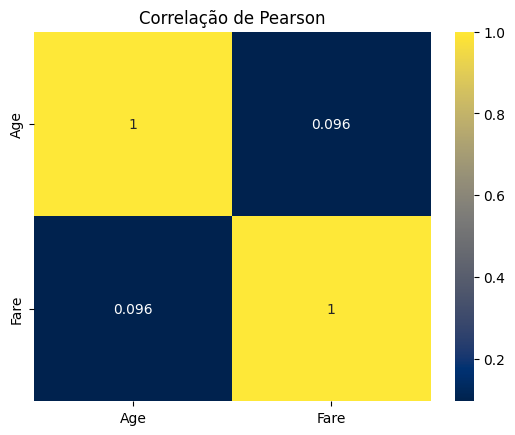

In [ ]:
sns.heatmap(corr_pearson, annot=True, cmap="cividis")
plt.title('Correlação de Pearson')
plt.show()

###Cálculo da Correlação  de Pearson entre todas as variáveis do df_train

In [ ]:
corr_pearson = df_train.corr()

print(round(corr_pearson, 3))

             PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
PassengerId        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
Survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
Age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
Parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
Fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000


<ipython-input-87-64d438672d41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df_train.corr()


A tabela acima mostra que:
- **Pclass** e **Fare** possuem correlação moderada negativa de -0,55.
- **SibSp** e **Parch** possuem correlação moderada positiva de 0,41.
- **Pclass** e **Survived** possuem correlação fraca negativa de -0,34.

####Conclusão

  Através dos conceitos de estatística descritiva foi possível obter insights sobre alguns grupos de passageiros que estavam mais predipostos a sobreviver diante a outros do naufrágio do navio, por exemplo, aqueles que pagaram maior valor na Tarifa e estavam na Primeira Classe.